In [1]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np

In [9]:
conn = psycopg2.connect(host="alcor.inf.unibz.it", database="admt_g01", user="admt_g01", password="3BckDwAj", port = 5433)

In [6]:
sql = "SELECT * FROM perc_npl_headcount;"
sql2 = "SELECT * FROM perc_npl;"
df = sqlio.read_sql_query(sql, conn)
df2 =  sqlio.read_sql_query(sql2, conn)

plt.bar( df.prov, df.perc_npl_headcount,alpha=0.5,  label='NPL % headcount', align='center')  #edge 
plt.bar( df2.prov, df2.perc_npl,alpha=0.7,  label='NPL % volume') 

plt.legend()
plt.show()

DatabaseError: Execution failed on sql 'SELECT * FROM perc_npl_headcount;': relation "perc_npl_headcount" does not exist
LINE 1: SELECT * FROM perc_npl_headcount;
                      ^


In [ ]:
sql = "SELECT * FROM perc_unpaid_install;"

df = sqlio.read_sql_query(sql, conn)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df.iloc[:,0], df.iloc[:,1],'ro-', linewidth=3, label= 'perc unpaid') 
#ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.legend()
plt.show()

In [ ]:
sql = "SELECT * FROM public.payments LIMIT 100;"

df = sqlio.read_sql_query(sql, conn)
df.head()

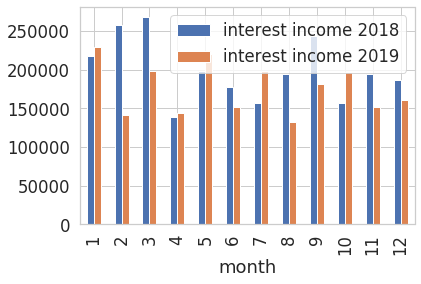

In [14]:
sql = """WITH interest_income_query AS(SELECT  s.sale_date_key, s.branch_key, s.product_key , s.customer_key, s. loan_amount , SUM(i.interest) AS interest_income
FROM
sale s, installment i
WHERE s.sale_date_key = i.sale_date_key AND
 s.branch_key = i.sale_branch_key AND 
 s.product_key = i.sale_product_key AND
 s.customer_key = i.sale_customer_key
GROUP BY s.sale_date_key, s.branch_key, s.product_key , s.customer_key) 
SELECT iq_2018.month, ROUND(iq_2018.fees::numeric,2) as "interest income 2018",  ROUND(iq_2019.fees::numeric,2) as "interest income 2019"
FROM  
(SELECT d.month, SUM(q.interest_income) AS fees 
FROM public."date" d, interest_income_query q
WHERE d.date_key = q.sale_date_key AND d.year = 2018 
group by d.month) AS iq_2018, 
(SELECT d.month, SUM(q.interest_income) AS fees 
FROM public."date" d, interest_income_query q
WHERE d.date_key = q.sale_date_key AND d.year = 2019 
GROUP BY d.month) AS iq_2019 
WHERE iq_2018.month = iq_2019.month 
ORDER BY iq_2019.month """

df = sqlio.read_sql_query(sql, conn)
df.head()

df.plot(x="month", y=["interest income 2018", "interest income 2019"], kind="bar")


In [ ]:
conn = None